In [3]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", "{:.5f}".format)

In [ ]:
files = ["2019-01", "2019-07", "2020-01", "2020-07"]
df = pd.concat(
    [
        pd.read_csv(
            f"../data/nyc_taxi_{fn}.csv",
            usecols=[
                "tpep_pickup_datetime",
                "passenger_count",
                "trip_distance",
                "fare_amount",
                "extra",
                "mta_tax",
                "tip_amount",
                "tolls_amount",
                "improvement_surcharge",
                "total_amount",
                "congestion_surcharge",
            ],
            parse_dates=[],
        )
        for fn in files
    ]
)
df.describe()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,21183631,21021384.00000,21183631.00000,21183631.00000,21183631.00000,21183631.00000,21183631.00000,21183631.00000,21183631.00000,21183631.00000,16327653.00000
mean,2019-07-21 01:38:21.157452544,1.54634,2.98881,12.89204,0.84065,0.49435,2.04156,0.35297,0.29857,17.86570,1.86521
min,2001-02-02 14:55:07,0.00000,-30.62000,-1238.00000,-60.00000,-0.50000,-221.00000,-70.00000,-0.30000,-1242.30000,-2.50000
25%,2019-01-23 04:10:17,1.00000,0.95000,6.50000,0.00000,0.50000,0.00000,0.00000,0.30000,9.96000,0.00000
50%,2019-07-16 13:12:46,1.00000,1.60000,9.00000,0.50000,0.50000,1.66000,0.00000,0.30000,13.55000,2.50000
75%,2020-01-10 23:03:10,2.00000,2.99000,14.00000,1.00000,0.50000,2.70000,0.00000,0.30000,19.30000,2.50000
max,2088-01-24 00:25:39,9.00000,256069.13000,623259.86000,535.38000,60.80000,1100.00000,3288.00000,0.60000,623261.66000,2.75000
std,NaN,1.19442,102.85825,157.99881,1.12602,0.06445,2.70679,1.89228,0.02821,158.28544,1.09797


# Exercises
1. Create a bar plot showing how many rides took place during each month and year of our data set (it's fine if there are holes in the plot).
2. Create a bar plot showing the total amount paid in taxi rides for every year and month of the data set.
3. Create a bar plot showing `fare_amount`, `extra`, `mta_tax`, `tip_amount`, and `tolls_amount` with the various components stacked in a single bar per year/month.
4. Create a bar plot showing `fare_amount`, `extra`, `mta_tax`, `tip_amount`, and `tolls_amount` paid in taxi rides per number of passengers, stacked in a single bar per number of passengers.
5. Create a histogram showing the frequency of each tipping percentage between (and including) 0% and 50%.

<Axes: xlabel='Year and Month', ylabel='Trips (millions)'>

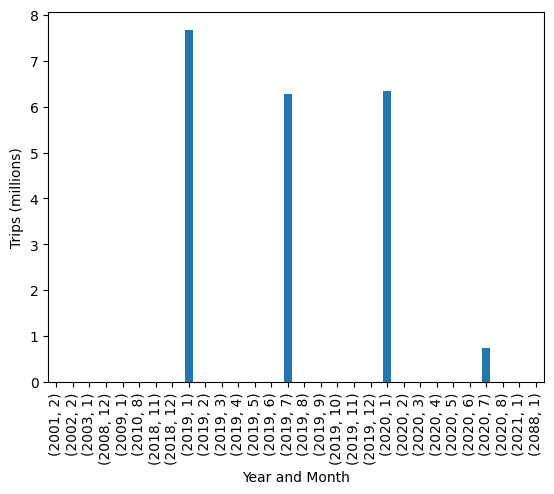

In [14]:
# 1. bar plot showing how many rides took place during each month and year
(
    df.groupby(
        [df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month]
    )["passenger_count"].count()
    / 1_000_000
).plot(kind="bar", ylabel="Trips (millions)", xlabel="Year and Month")

<Axes: xlabel='Year and Month', ylabel='Total fare amount ($ millions)'>

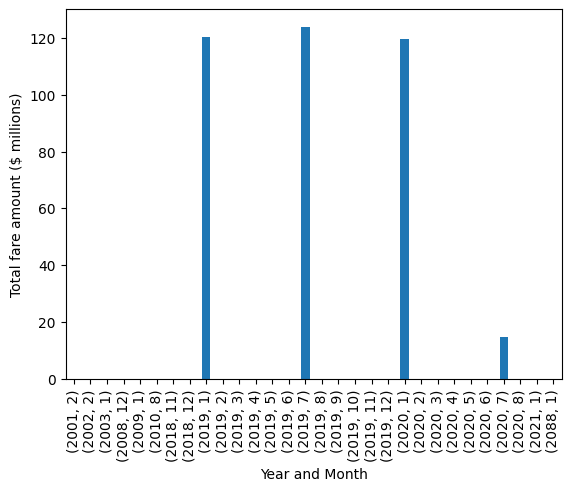

In [ ]:
# 2. bar plot of total amount paid in taxi rides for each year and month in the data set
(
    df.groupby(
        [df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month]
    )["total_amount"].sum()
    / 1_000_000
).plot(kind="bar", ylabel="Total fare amount ($ millions)", xlabel="Year and Month")

<Axes: xlabel='Year and Month', ylabel='Fare breakdown ($ millions)'>

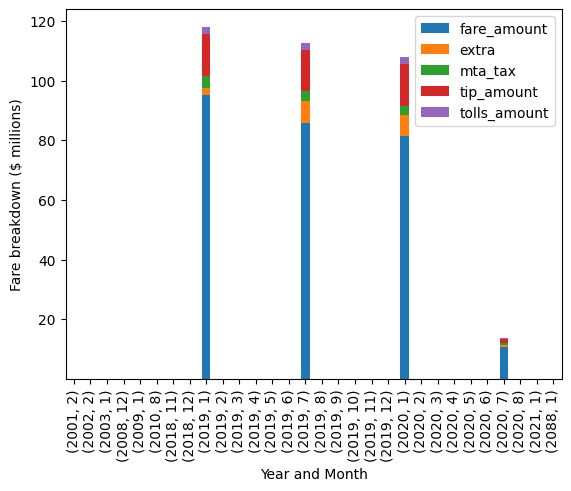

In [18]:
# 3. Create a bar plot showing `fare_amount`, `extra`, `mta_tax`, `tip_amount`, and `tolls_amount` with the various components stacked in a single bar per year/month.
(
    df.groupby(
        [df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month]
    )[["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount"]].sum()
    / 1_000_000
).plot(
    kind="bar",
    ylabel="Fare breakdown ($ millions)",
    xlabel="Year and Month",
    legend=True,
    stacked=True,
)

<Axes: xlabel='Number of Passengers', ylabel='Fare breakdown ($ millions)'>

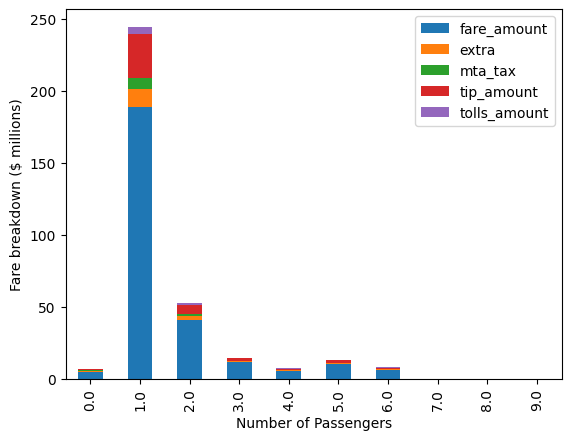

In [ ]:
# 4. Create a bar plot showing `fare_amount`, `extra`, `mta_tax`, `tip_amount`, and `tolls_amount` paid in taxi rides per number of passengers, stacked in a single bar per number of passengers.
(
    df.groupby("passenger_count")[
        ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount"]
    ].sum()
    / 1_000_000
).plot(
    kind="bar",
    ylabel="Fare breakdown ($ millions)",
    xlabel="Number of Passengers",
    legend=True,
    stacked=True,
)

In [21]:
# 5. Create a histogram showing the frequency of each tipping percentage between (and including) 0% and 50%.
# create the tip percentage column

# convert NaN values to 0 for numeric columns
for c in [
    "fare_amount",
    "extra",
    "mta_tax",
    "tolls_amount",
    "improvement_surcharge",
    "congestion_surcharge",
    "tip_amount",
    "total_amount",
]:
    df.loc[df[c].isna(), c] = 0

# create a pre-tip amount column and tip percentage column
df["pre_tip_amount"] = df[
    [
        "fare_amount",
        "extra",
        "mta_tax",
        "tolls_amount",
        "improvement_surcharge",
        "congestion_surcharge",
    ]
].sum(axis="columns")
df["tip_percentage"] = df["tip_amount"] / df["pre_tip_amount"]


In [30]:
(
    pd.cut(
        df["tip_percentage"],
        bins=[0, 0.5, 1, float("inf")],
        labels=["lower", "upper", "exceeds"],
    )
).value_counts()

tip_percentage
lower      14498244
upper         30193
exceeds       11538
Name: count, dtype: int64

<Axes: xlabel='Tip Percentage', ylabel='Frequency'>

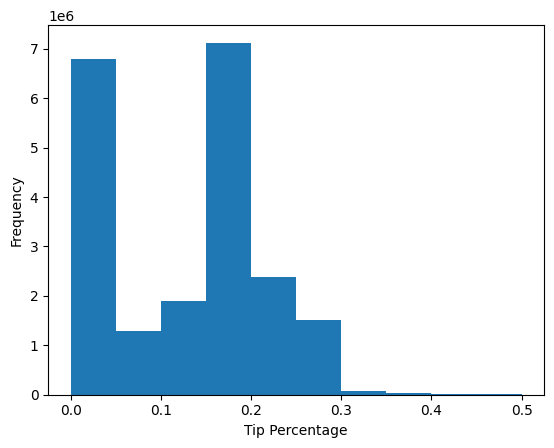

In [34]:
# now create the histogram using the tip percentage
(
    df.loc[
        (df["tip_percentage"] >= 0) & (df["tip_percentage"] <= 0.5), "tip_percentage"
    ].plot(kind="hist", xlabel="Tip Percentage")
)

<Axes: xlabel='Tip Percentage', ylabel='Frequency'>

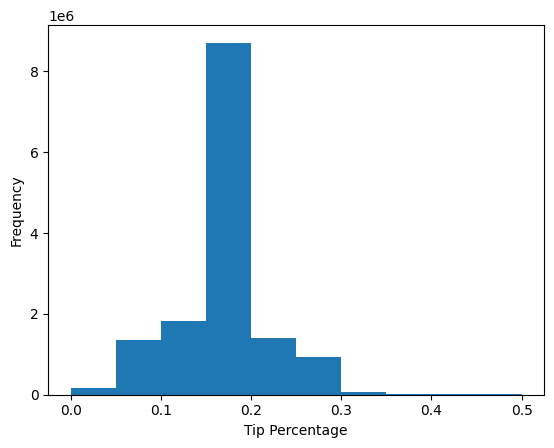

In [35]:
# now let's look at that taking off the lower border of people who did not tip
# the previous histogram makes it look like there's a large volume of small tippers,
# whereas this makes it clear that tips are mostly in the 15-20% range
(
    df.loc[
        (df["tip_percentage"] > 0) & (df["tip_percentage"] <= 0.5), "tip_percentage"
    ].plot(kind="hist", xlabel="Tip Percentage")
)

# Extension questions
1. Create a bar plot showing the average distance traveled per day of the week in July 2020. The x axis should show the name of each day.
2. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with total_amount. Ignore all rides in which either value was less than or equal to 0 or greater than 500.
3. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with passenger_count. Ignore all rides in which trip_distance was less than or equal to 0 or greater than 500.

In [63]:
dfjuly2020 = pd.read_csv(
    "../data/nyc_taxi_2020-07.csv",
    usecols=[
        "tpep_pickup_datetime",
        "passenger_count",
        "trip_distance",
        "fare_amount",
        "extra",
        "mta_tax",
        "tip_amount",
        "tolls_amount",
        "improvement_surcharge",
        "total_amount",
        "congestion_surcharge",
    ],
    parse_dates=["tpep_pickup_datetime"],
)

<Axes: xlabel='Day of the Week', ylabel='Average Trip Distance (miles)'>

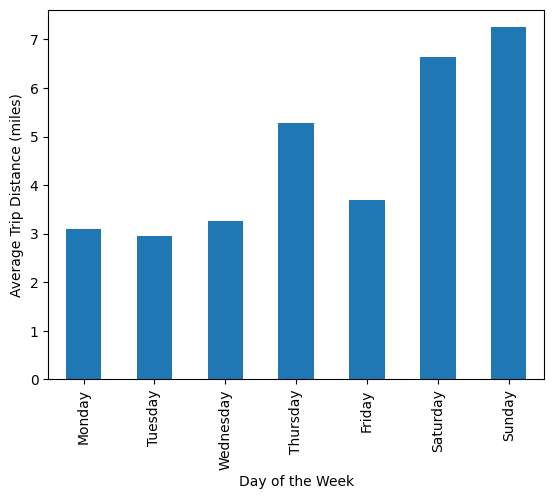

In [65]:
# 1. bar plot showing the average distance traveled per day of the week in July 2020
(
    dfjuly2020.groupby(dfjuly2020["tpep_pickup_datetime"].dt.day_name())[
        "trip_distance"
    ]
    .mean()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
    .plot(kind="bar", ylabel="Average Trip Distance (miles)", xlabel="Day of the Week")
)

<Axes: xlabel='Trip Distance (miles)', ylabel='Total Fare ($)'>

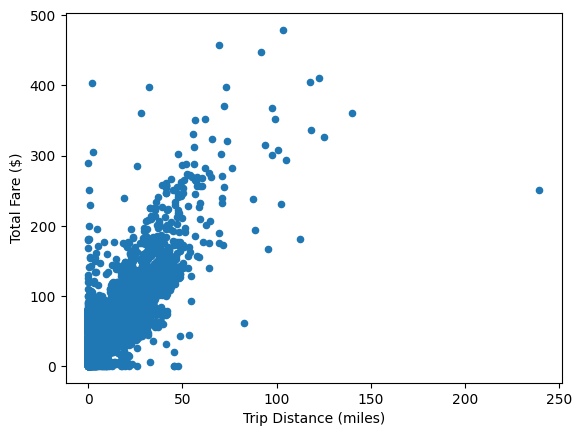

In [66]:
# 2. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with total_amount.
# Ignore all rides in which either value was less than or equal to 0 or greater than 500.
(
    dfjuly2020.loc[
        (dfjuly2020["trip_distance"] > 0)
        & (dfjuly2020["trip_distance"] <= 500)
        & (dfjuly2020["total_amount"] <= 500)
        & (dfjuly2020["total_amount"] > 0),
        ["trip_distance", "total_amount"],
    ].plot(
        kind="scatter",
        x="trip_distance",
        xlabel="Trip Distance (miles)",
        y="total_amount",
        ylabel="Total Fare ($)",
    )
)

<Axes: xlabel='Trip distance (miles)', ylabel='Passengers'>

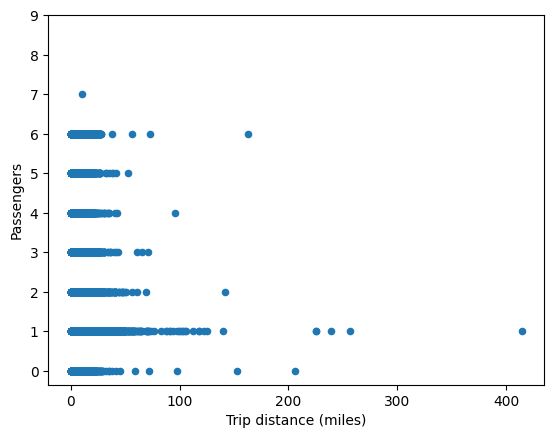

In [67]:
# 3. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with passenger_count.
# Ignore all rides in which trip_distance was less than or equal to 0 or greater than 500.
(
    dfjuly2020.loc[
        (dfjuly2020["trip_distance"] > 0) & (dfjuly2020["trip_distance"] <= 500),
        ["trip_distance", "passenger_count"],
    ].plot(
        kind="scatter",
        x="trip_distance",
        xlabel="Trip distance (miles)",
        y="passenger_count",
        ylabel="Passengers",
        yticks=list(range(10)),
    )
)